<a href="https://colab.research.google.com/github/FlorenciaGobbi/PortfolioProjects/blob/main/Movie_Correlation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

import io
from google.colab import files

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plots we will create
pd.options.mode.chained_assignment = None

Read in Data

In [ ]:
# Read in the data
uploaded = files.upload()

Saving movies.csv to movies (3).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['movies (3).csv']))

In [ ]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

Data Cleaning

In [ ]:
# Seek for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [ ]:
# Remove null values
df.dropna(inplace=True)

In [ ]:
# Data Types for our columns
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [ ]:
# Change data type of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [ ]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

In [ ]:
# Create correct year column
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df = df.drop(['year', 'released'], axis=1)
df.head()

name rating      genre  score  \
0                                     The Shining      R      Drama    8.4   
1                                 The Blue Lagoon      R  Adventure    5.8   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action    8.7   
3                                       Airplane!     PG     Comedy    7.7   
4                                      Caddyshack      R     Comedy    7.3   

       votes         director                   writer            star  \
0   927000.0  Stanley Kubrick             Stephen King  Jack Nicholson   
1    65000.0   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   
2  1200000.0   Irvin Kershner           Leigh Brackett     Mark Hamill   
3   221000.0     Jim Abrahams             Jim Abrahams     Robert Hays   
4   108000.0     Harold Ramis       Brian Doyle-Murray     Chevy Chase   

          country    budget      gross             company  runtime  \
0  United Kingdom  19000000   46998772        Warner Bros.    146.0   
1   United States   4500000   58853106   Columbia Pictures    104.0   
2   United States  18000000  538375067           Lucasfilm    124.0   
3   United States   3500000   83453539  Paramount Pictures     88.0   
4   United States   6000000   39846344      Orion Pictures     98.0   

   yearcorrect  
0         1980  
1         1980  
2         1980  
3         1980  
4         1980

In [ ]:
# Sort the values by the 'gross' column.
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [ ]:
# Set the maximum number of rows displayed
pd.set_option('display.max_rows', None)

In [ ]:
# Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

<Axes: >

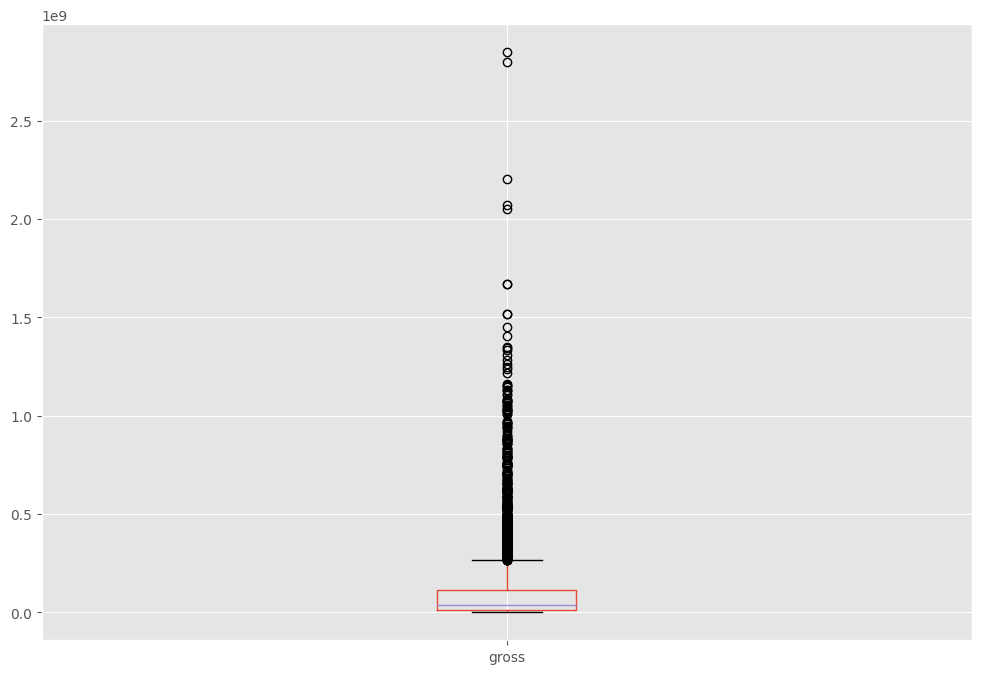

In [ ]:
# Are there any Outliers?
df.boxplot(column=['gross'])

Finding Correlationas in the Data

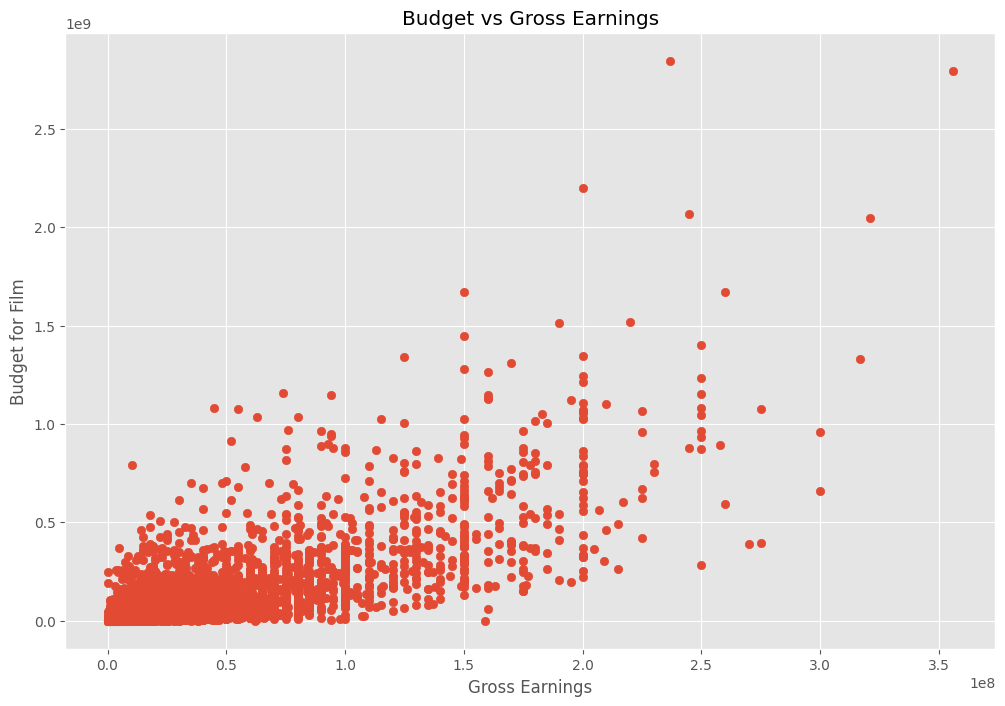

In [ ]:
# Scatter plot with budget vs gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

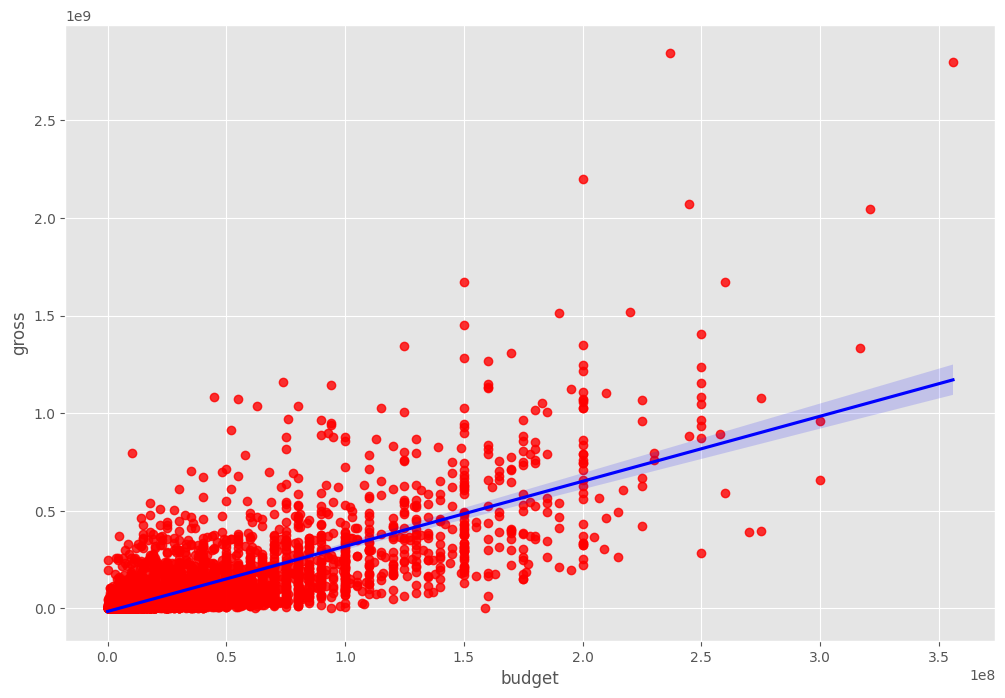

In [ ]:
# Plot budget vs gross using seaborn
sns.regplot(x="budget", y="gross", data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [ ]:
# Correlation Matrix between all numeric columns
df.corr(method ='pearson')

<ipython-input-73-3c0b2351d71c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='pearson')


score     votes    budget     gross   runtime  yearcorrect
score        1.000000  0.474256  0.072001  0.222556  0.414068     0.061923
votes        0.474256  1.000000  0.439675  0.614751  0.352303     0.203098
budget       0.072001  0.439675  1.000000  0.740247  0.318695     0.320312
gross        0.222556  0.614751  0.740247  1.000000  0.275796     0.268721
runtime      0.414068  0.352303  0.318695  0.275796  1.000000     0.075294
yearcorrect  0.061923  0.203098  0.320312  0.268721  0.075294     1.000000

In [ ]:
df.corr(method ='kendall')

<ipython-input-74-3c40e6c20ed3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='kendall')


score     votes    budget     gross   runtime  yearcorrect
score        1.000000  0.350185 -0.006406  0.124943  0.292254     0.043400
votes        0.350185  1.000000  0.346274  0.553625  0.205344     0.293044
budget      -0.006406  0.346274  1.000000  0.512057  0.231278     0.213719
gross        0.124943  0.553625  0.512057  1.000000  0.176979     0.232372
runtime      0.292254  0.205344  0.231278  0.176979  1.000000     0.064793
yearcorrect  0.043400  0.293044  0.213719  0.232372  0.064793     1.000000

In [ ]:
df.corr(method ='spearman')

<ipython-input-75-b3d2d6ba4d44>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='spearman')


score     votes    budget     gross   runtime  yearcorrect
score        1.000000  0.495409 -0.009971  0.183192  0.412155     0.063674
votes        0.495409  1.000000  0.493461  0.745793  0.300621     0.422988
budget      -0.009971  0.493461  1.000000  0.692958  0.330794     0.302535
gross        0.183192  0.745793  0.692958  1.000000  0.257400     0.340529
runtime      0.412155  0.300621  0.330794  0.257400  1.000000     0.095507
yearcorrect  0.063674  0.422988  0.302535  0.340529  0.095507     1.000000

<ipython-input-76-4ebcfe8efc91>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method ='pearson')


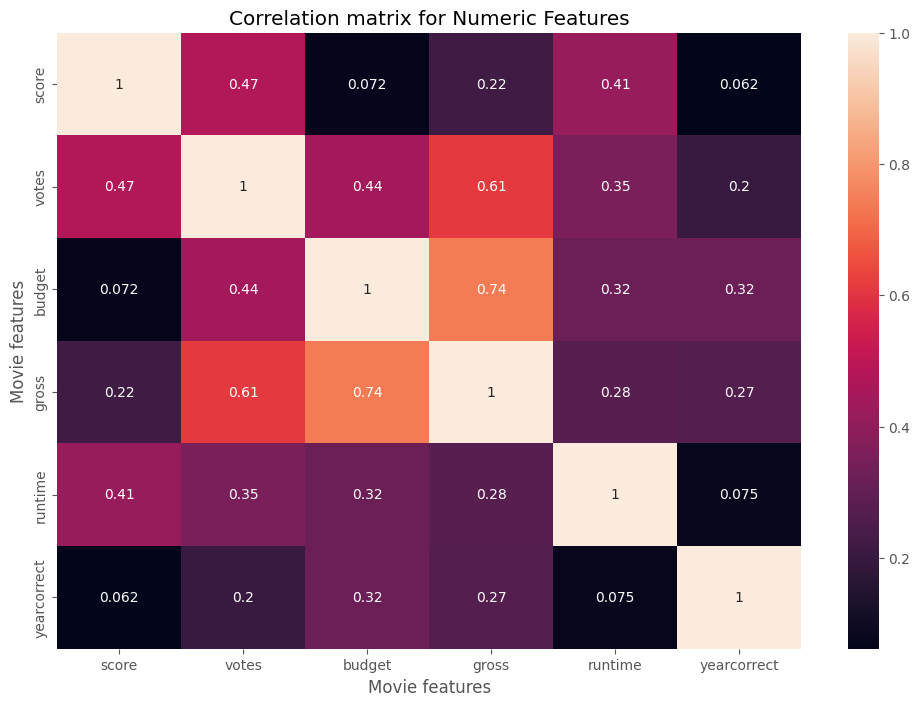

In [ ]:
correlation_matrix = df.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [ ]:
# Looks at Company
df.head()

name rating   genre  score  \
5445                                      Avatar  PG-13  Action    7.8   
7445                           Avengers: Endgame  PG-13  Action    8.4   
3045                                     Titanic  PG-13   Drama    7.8   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action    7.8   
7244                      Avengers: Infinity War  PG-13  Action    8.4   

          votes       director              writer               star  \
5445  1100000.0  James Cameron       James Cameron    Sam Worthington   
7445   903000.0  Anthony Russo  Christopher Markus  Robert Downey Jr.   
3045  1100000.0  James Cameron       James Cameron  Leonardo DiCaprio   
6663   876000.0    J.J. Abrams     Lawrence Kasdan       Daisy Ridley   
7244   897000.0  Anthony Russo  Christopher Markus  Robert Downey Jr.   

            country     budget       gross                company  runtime  \
5445  United States  237000000  2847246203  Twentieth Century Fox    162.0   
7445  United States  356000000  2797501328         Marvel Studios    181.0   
3045  United States  200000000  2201647264  Twentieth Century Fox    194.0   
6663  United States  245000000  2069521700              Lucasfilm    138.0   
7244  United States  321000000  2048359754         Marvel Studios    149.0   

      yearcorrect  
5445         2009  
7445         2019  
3045         1997  
6663         2015  
7244         2018

In [ ]:
# Assigning a random numeric value for each unique categorical value

df_numerized = df
for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

name  rating  genre  score      votes  director  writer  star  country  \
5445   386       5      0    7.8  1100000.0       785    1263  1534       47   
7445   388       5      0    8.4   903000.0       105     513  1470       47   
3045  4909       5      6    7.8  1100000.0       785    1263  1073       47   
6663  3643       5      0    7.8   876000.0       768    1806   356       47   
7244   389       5      0    8.4   897000.0       105     513  1470       47   
7480  4388       4      2    6.9   222000.0      1012    1361   457       47   
6653  2117       5      0    7.0   593000.0       335    2523   293       47   
6043  3878       5      0    8.0  1300000.0      1060    1646  1470       47   
6646  1541       5      0    7.1   370000.0       809     481  1785       47   
7494  1530       4      2    6.8   148000.0       277    1383  1036       47   
6644   387       5      0    7.3   777000.0      1060    1646  1470       47   
7247   567       5      0    7.3   661000.0      1716    2687   260       47   
5845  1731       5      1    8.1   790000.0       452    2862   379       46   
7075  3644       5      0    7.0   581000.0      1589    2487   356       47   
7271  2118       5      0    6.2   277000.0       764     777   293       47   
6262  1529       4      2    7.4   585000.0       277    1383  1036       47   
7072   477       4      7    7.1   283000.0       155    2822   533       47   
7281  1966       4      2    7.6   263000.0       193     327   344       47   
7055  4119       5      0    6.6   214000.0       567    1013  1785        8   
6244  2014       5      0    7.1   779000.0      1767     837  1470       47   
6688  2545       4      2    6.4   218000.0      1144     362  1542       47   
6846   750       5      0    7.8   694000.0       105     513   283       47   
7250   343       5      0    6.9   404000.0       809     699   759       47   
4245  4407       5      0    8.9  1700000.0      1520    1238   497       32   
7458  3595       5      0    7.5   359000.0      1019     479  1738       47   
7456   755       5      0    6.8   478000.0        96     182   208       47   
5878  4950       5      0    6.2   390000.0      1302     886  1610       47   
6059  3498       5      0    7.7   642000.0      1732    2221   373       46   
6494  4949       5      0    5.6   302000.0      1302     886  1161       47   
2448  4388       1      2    8.5   970000.0      1685    1206  1187       47   
6047  4048       5      0    8.4  1600000.0       317    1606   297       46   
7463  3640       5      0    6.5   394000.0       768     489   356       47   
7450  2091       6      5    8.4  1000000.0      1937    2998   844       47   
7488  4936       1      2    7.7   217000.0      1052    1525  1735       47   
5685  4935       1      2    8.2   776000.0      1162    1525  1735       47   
4852  2985       5      0    7.3   668000.0       674    2927   889       47   
6869  3260       5      0    7.8   572000.0       615     492   555       47   
7481   206       4      1    6.9   239000.0       705    1468  1812       46   
5860  2988       5      0    6.6   492000.0      1635    2927   889       47   
7140  1102       4      2    6.3   119000.0      1144     524  1644       47   
2245  2115       5      0    8.1   894000.0      1859    2070  1529       47   
6908  1411       4      2    7.3   250000.0        81     153   512       47   
3451  3637       4      0    6.5   748000.0       653    1046   550       47   
5667   215       4      1    6.4   392000.0      1918    1849  1216       47   
6863  5329       4      2    8.0   450000.0       239     390   613       47   
6045  4240       5      1    7.8   773000.0      1520     967  1166       32   
3843  1736       4      1    7.6   685000.0       280    1236   379       46   
5243  4047       5      0    9.0  2400000.0       317    1606   297       47   
6311  1101       4      2    7.3   377000.0      1556     524  1644       47   
6905  

In [ ]:
df

name  rating  genre  score      votes  director  writer  star  country  \
5445   386       5      0    7.8  1100000.0       785    1263  1534       47   
7445   388       5      0    8.4   903000.0       105     513  1470       47   
3045  4909       5      6    7.8  1100000.0       785    1263  1073       47   
6663  3643       5      0    7.8   876000.0       768    1806   356       47   
7244   389       5      0    8.4   897000.0       105     513  1470       47   
7480  4388       4      2    6.9   222000.0      1012    1361   457       47   
6653  2117       5      0    7.0   593000.0       335    2523   293       47   
6043  3878       5      0    8.0  1300000.0      1060    1646  1470       47   
6646  1541       5      0    7.1   370000.0       809     481  1785       47   
7494  1530       4      2    6.8   148000.0       277    1383  1036       47   
6644   387       5      0    7.3   777000.0      1060    1646  1470       47   
7247   567       5      0    7.3   661000.0      1716    2687   260       47   
5845  1731       5      1    8.1   790000.0       452    2862   379       46   
7075  3644       5      0    7.0   581000.0      1589    2487   356       47   
7271  2118       5      0    6.2   277000.0       764     777   293       47   
6262  1529       4      2    7.4   585000.0       277    1383  1036       47   
7072   477       4      7    7.1   283000.0       155    2822   533       47   
7281  1966       4      2    7.6   263000.0       193     327   344       47   
7055  4119       5      0    6.6   214000.0       567    1013  1785        8   
6244  2014       5      0    7.1   779000.0      1767     837  1470       47   
6688  2545       4      2    6.4   218000.0      1144     362  1542       47   
6846   750       5      0    7.8   694000.0       105     513   283       47   
7250   343       5      0    6.9   404000.0       809     699   759       47   
4245  4407       5      0    8.9  1700000.0      1520    1238   497       32   
7458  3595       5      0    7.5   359000.0      1019     479  1738       47   
7456   755       5      0    6.8   478000.0        96     182   208       47   
5878  4950       5      0    6.2   390000.0      1302     886  1610       47   
6059  3498       5      0    7.7   642000.0      1732    2221   373       46   
6494  4949       5      0    5.6   302000.0      1302     886  1161       47   
2448  4388       1      2    8.5   970000.0      1685    1206  1187       47   
6047  4048       5      0    8.4  1600000.0       317    1606   297       46   
7463  3640       5      0    6.5   394000.0       768     489   356       47   
7450  2091       6      5    8.4  1000000.0      1937    2998   844       47   
7488  4936       1      2    7.7   217000.0      1052    1525  1735       47   
5685  4935       1      2    8.2   776000.0      1162    1525  1735       47   
4852  2985       5      0    7.3   668000.0       674    2927   889       47   
6869  3260       5      0    7.8   572000.0       615     492   555       47   
7481   206       4      1    6.9   239000.0       705    1468  1812       46   
5860  2988       5      0    6.6   492000.0      1635    2927   889       47   
7140  1102       4      2    6.3   119000.0      1144     524  1644       47   
2245  2115       5      0    8.1   894000.0      1859    2070  1529       47   
6908  1411       4      2    7.3   250000.0        81     153   512       47   
3451  3637       4      0    6.5   748000.0       653    1046   550       47   
5667   215       4      1    6.4   392000.0      1918    1849  1216       47   
6863  5329       4      2    8.0   450000.0       239     390   613       47   
6045  4240       5      1    7.8   773000.0      1520     967  1166       32   
3843  1736       4      1    7.6   685000.0       280    1236   379       46   
5243  4047       5      0    9.0  2400000.0       317    1606   297       47   
6311  1101       4      2    7.3   377000.0      1556     524  1644       47   
6905  

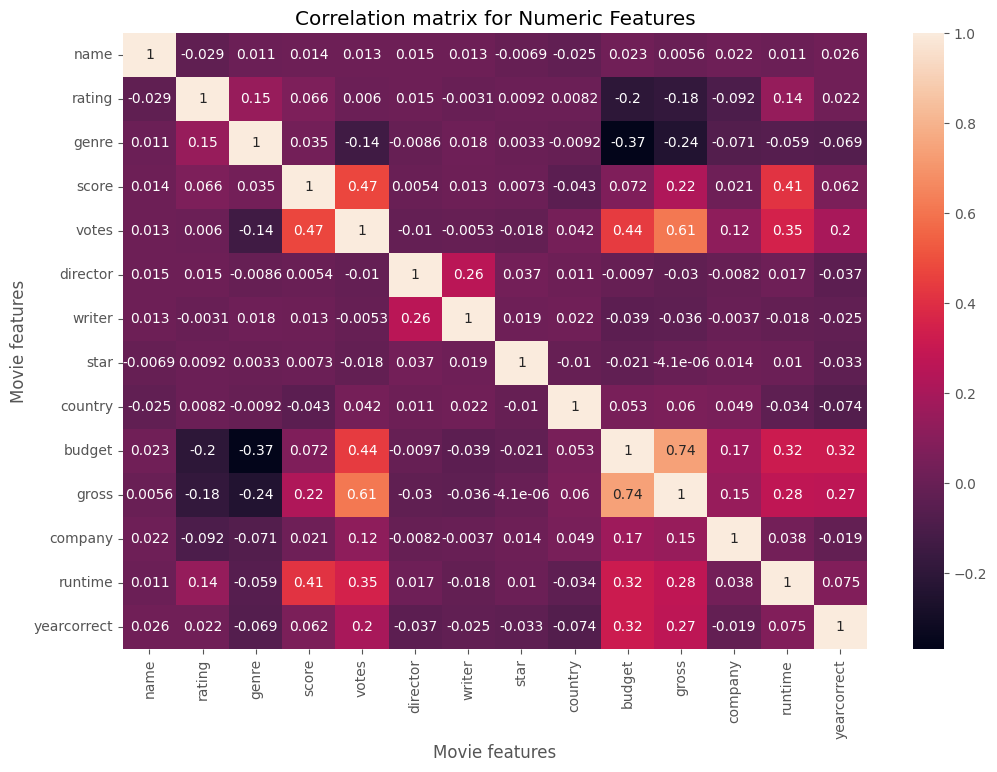

In [ ]:
correlation_matrix = df_numerized.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [ ]:
df_numerized.corr()

name    rating     genre     score     votes  director  \
name         1.000000 -0.029234  0.010996  0.014450  0.012615  0.015246   
rating      -0.029234  1.000000  0.147796  0.065983  0.006031  0.014656   
genre        0.010996  0.147796  1.000000  0.035106 -0.135990 -0.008553   
score        0.014450  0.065983  0.035106  1.000000  0.474256  0.005413   
votes        0.012615  0.006031 -0.135990  0.474256  1.000000 -0.010376   
director     0.015246  0.014656 -0.008553  0.005413 -0.010376  1.000000   
writer       0.012880 -0.003149  0.017578  0.012843 -0.005316  0.261735   
star        -0.006882  0.009196  0.003341  0.007296 -0.017638  0.036593   
country     -0.025490  0.008230 -0.009164 -0.043051  0.041551  0.011133   
budget       0.023392 -0.203946 -0.368523  0.072001  0.439675 -0.009662   
gross        0.005639 -0.181906 -0.244101  0.222556  0.614751 -0.029560   
company      0.021697 -0.092357 -0.071334  0.020656  0.118470 -0.008223   
runtime      0.010850  0.140792 -0.059237  0.414068  0.352303  0.017433   
yearcorrect  0.025542  0.022021 -0.069147  0.061923  0.203098 -0.037371   

               writer      star   country    budget     gross   company  \
name         0.012880 -0.006882 -0.025490  0.023392  0.005639  0.021697   
rating      -0.003149  0.009196  0.008230 -0.203946 -0.181906 -0.092357   
genre        0.017578  0.003341 -0.009164 -0.368523 -0.244101 -0.071334   
score        0.012843  0.007296 -0.043051  0.072001  0.222556  0.020656   
votes       -0.005316 -0.017638  0.041551  0.439675  0.614751  0.118470   
director     0.261735  0.036593  0.011133 -0.009662 -0.029560 -0.008223   
writer       1.000000  0.018520  0.022488 -0.039466 -0.035885 -0.003697   
star         0.018520  1.000000 -0.009990 -0.021473 -0.000004  0.014082   
country      0.022488 -0.009990  1.000000  0.052977  0.060078  0.048569   
budget      -0.039466 -0.021473  0.052977  1.000000  0.740247  0.170235   
gross       -0.035885 -0.000004  0.060078  0.740247  1.000000  0.149553   
company     -0.003697  0.014082  0.048569  0.170235  0.149553  1.000000   
runtime     -0.017561  0.010108 -0.034477  0.318695  0.275796  0.037585   
yearcorrect -0.025495 -0.032687 -0.073569  0.320312  0.268721 -0.018806   

              runtime  yearcorrect  
name         0.010850     0.025542  
rating       0.140792     0.022021  
genre       -0.059237    -0.069147  
score        0.414068     0.061923  
votes        0.352303     0.203098  
director     0.017433    -0.037371  
writer      -0.017561    -0.025495  
star         0.010108    -0.032687  
country     -0.034477    -0.073569  
budget       0.318695     0.320312  
gross        0.275796     0.268721  
company      0.037585    -0.018806  
runtime      1.000000     0.075294  
yearcorrect  0.075294     1.000000

In [ ]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect    0.025542
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
             budget        -0.203946
             gross         -0.181906
             company       -0.092357
             runtime        0.140792
 

In [ ]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
genre        gross         -0.244101
gross        genre         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
genre        votes         -0.135990
votes        genre         -0.135990
company      rating        -0.092357
rating       company       -0.092357
yearcorrect  country       -0.073569
country      yearcorrect   -0.073569
company      genre         -0.071334
genre        company       -0.071334
yearcorrect  genre         -0.069147
genre        yearcorrect   -0.069147
runtime      genre         -0.059237
genre        runtime       -0.059237
score        country       -0.043051
country      score         -0.043051
budget       writer        -0.039466
writer       budget        -0.039466
yearcorrect  director      -0.037371
director     yearcorrect   -0.037371
writer       gross         -0.035885
g

In [ ]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr


gross        votes          0.614751
votes        gross          0.614751
budget       gross          0.740247
gross        budget         0.740247
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings.
# Company has low correlation.